# Calories Prediction 

### Load the Liberaries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
import lightgbm as lightgbm
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

### Load tha data

In [2]:
# load the data
df1 = pd.read_csv('exercise.csv')
df2 = pd.read_csv('calories.csv')


In [3]:
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df = pd.concat([df1, df2['Calories']], axis=1)

In [4]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [5]:
df.shape

(15000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
df.drop('User_ID', axis=1, inplace=True)

### Analysis of Data

In [8]:
# check the gender Column
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9400\1964912911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


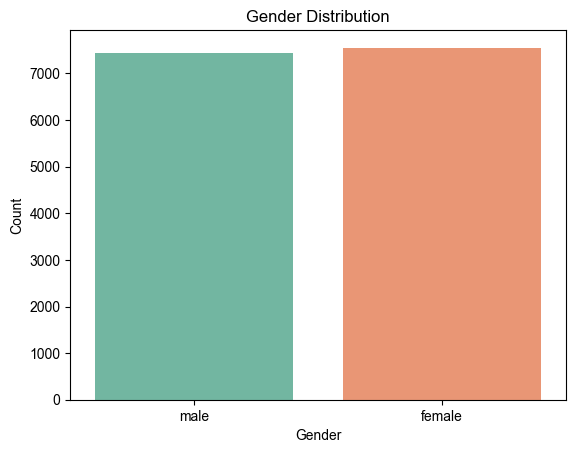

In [9]:
# draw the count plot of gender columns
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
sns.set(style="whitegrid")
plt.show()

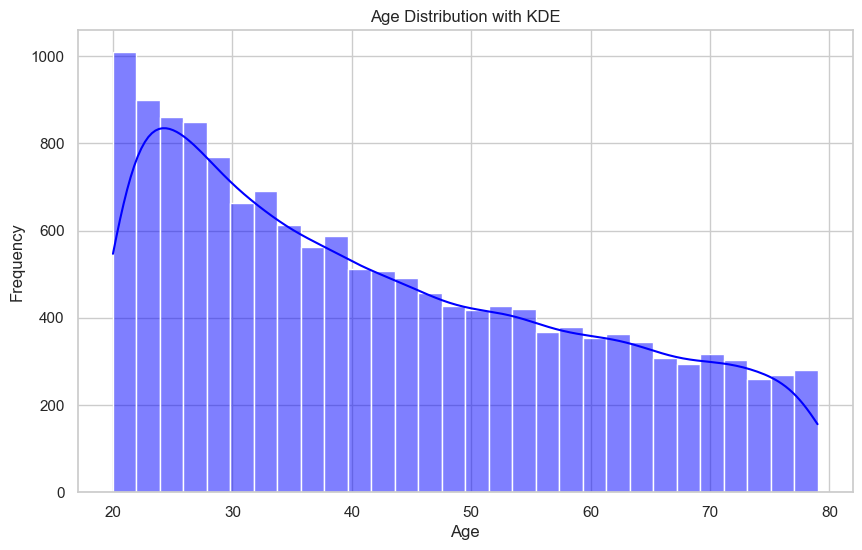

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='blue', bins=30)
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

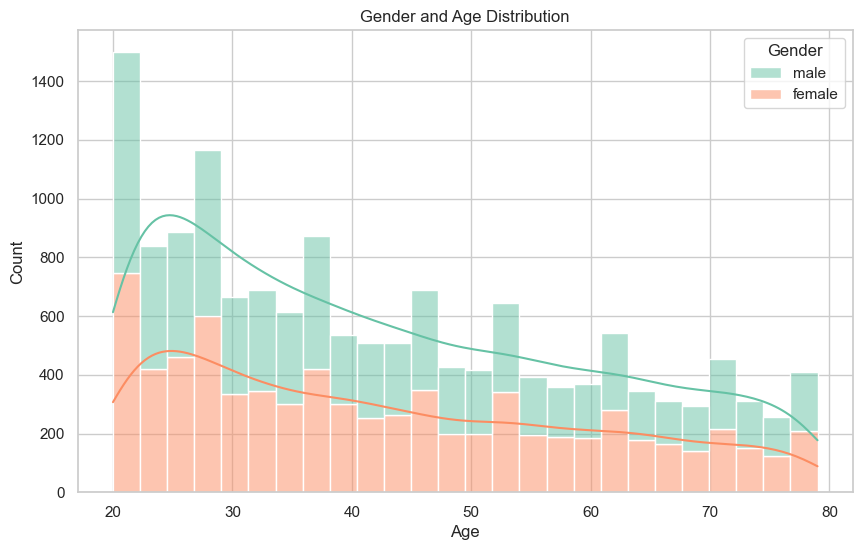

In [11]:
# check the age column draw the graph to analyze the gender distribution and age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue="Gender", multiple="stack", palette="Set2", kde=True)
plt.title('Gender and Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


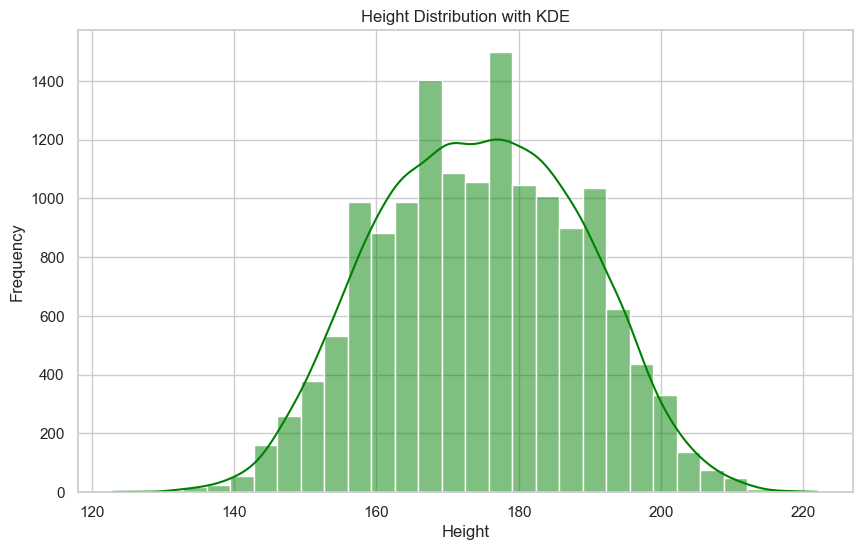

In [12]:
# Analyze the Height column
plt.figure(figsize=(10, 6))
sns.histplot(df['Height'], kde=True, color='green', bins=30)
plt.title('Height Distribution with KDE')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()



C:\Users\lenovo\AppData\Local\Temp\ipykernel_9400\1550743047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Height', data=df, palette='Set2')


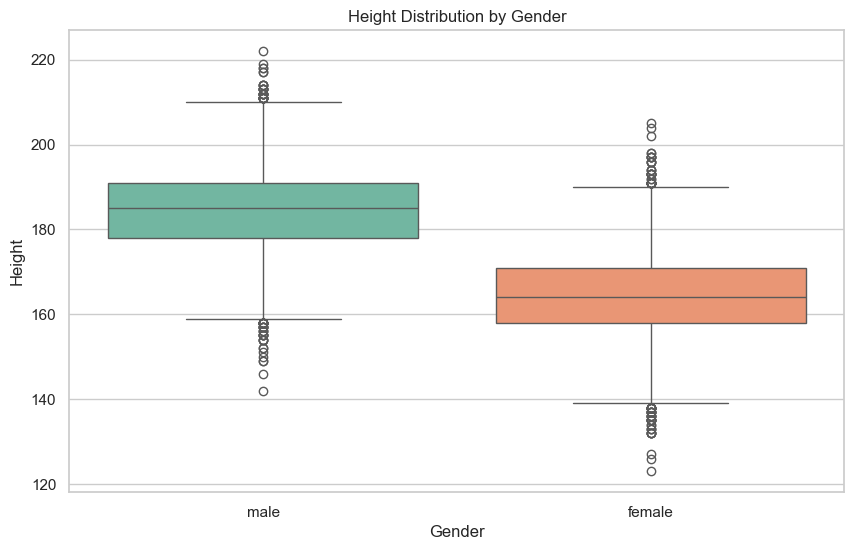

In [13]:
# Check the Height column with Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Height', data=df, palette='Set2')
plt.title('Height Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Height')
plt.show()


In [14]:
fig = px.scatter(df, x='Age', y='Height', color='Gender', title='Height vs Age with Gender', labels={'Age': 'Age', 'Height': 'Height'})
fig.show()


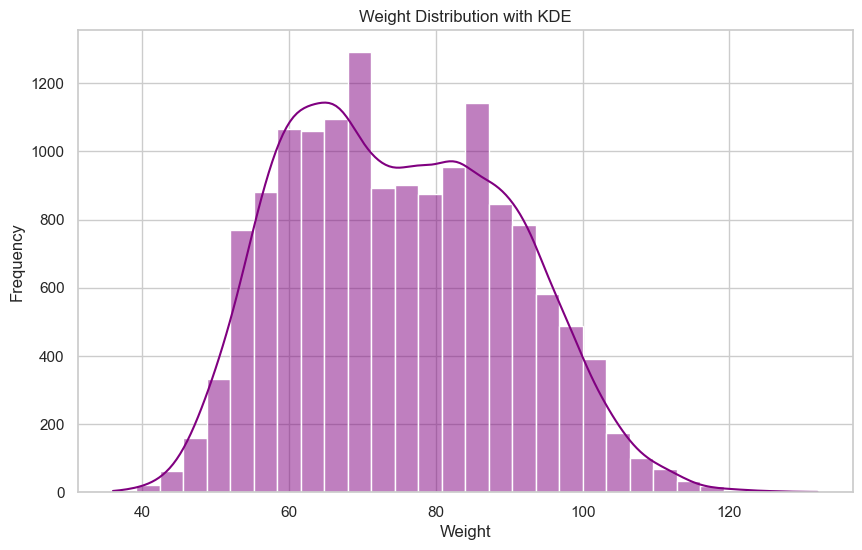

In [15]:
# Analyze the Weight column
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight'], kde=True, color='purple', bins=30)
plt.title('Weight Distribution with KDE')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [16]:
fig = px.scatter(df, x='Age', y='Weight', color='Gender', title='Weight vs Age with Gender', labels={'Age': 'Age', 'Weight': 'Weight'})
fig.show()

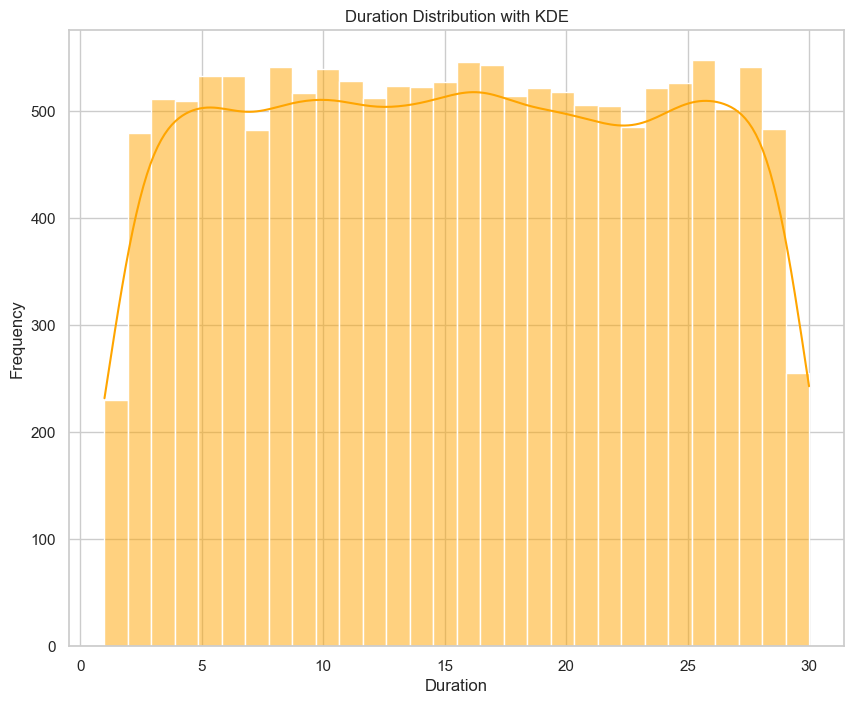

In [17]:
plt.figure(figsize=(10, 8))
sns.histplot(df['Duration'], kde=True, color='orange', bins=30)
plt.title('Duration Distribution with KDE')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [18]:
fig = px.scatter(df, x='Age', y='Duration', color='Gender', title='Duration vs Age with Gender', labels={'Age': 'Age', 'Duration': 'Duration'})
fig.show()

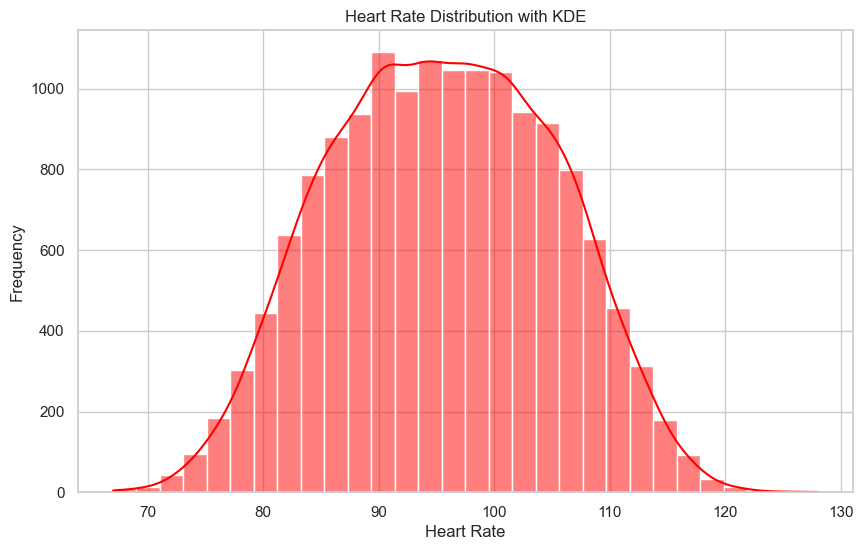

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Heart_Rate'], kde=True, color='red', bins=30)
plt.title('Heart Rate Distribution with KDE')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

In [20]:
fig = px.scatter(df, x='Age', y='Heart_Rate', color='Gender', title='Heart Rate vs Age with Gender', labels={'Age': 'Age', 'Heart_Rate': 'Heart Rate'})
fig.show()

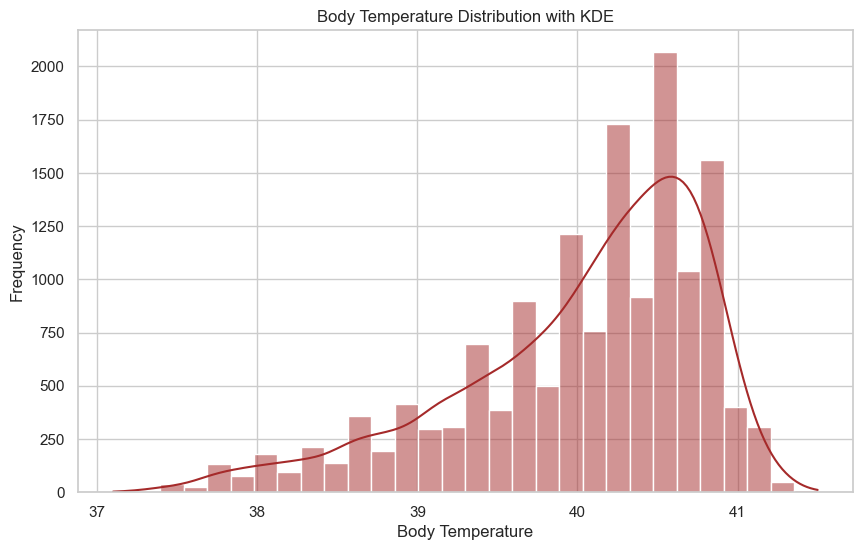

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Body_Temp'], kde=True, color='brown', bins=30)
plt.title('Body Temperature Distribution with KDE')
plt.xlabel('Body Temperature')
plt.ylabel('Frequency')
plt.show()

In [22]:

fig = px.scatter(df, x='Age', y='Body_Temp', color='Gender', title='Body Temperature vs Age with Gender', labels={'Age': 'Age', 'Body_Temp': 'Body Temperature'})
fig.show()

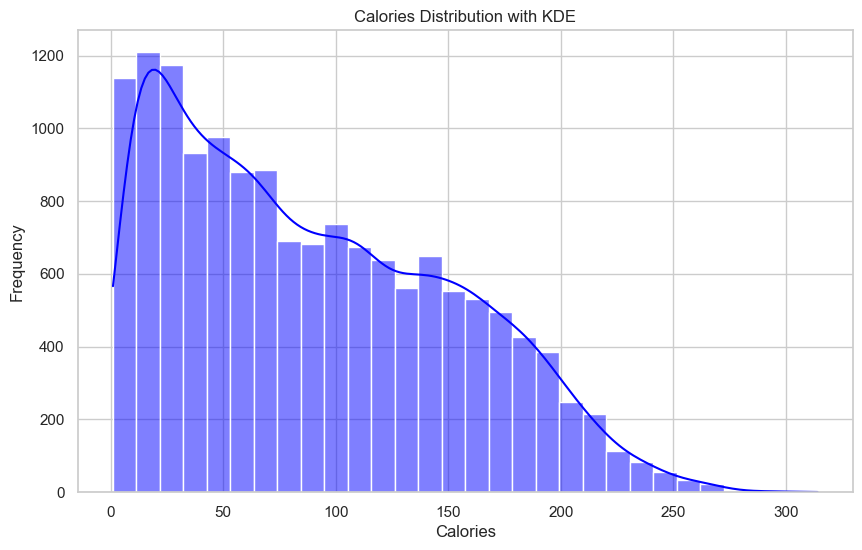

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Calories'], kde=True, color='blue', bins=30)
plt.title('Calories Distribution with KDE')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

In [24]:
fig = px.scatter(df, x='Age', y='Calories', color='Gender', title='Calories vs Age with Gender', labels={'Age': 'Age', 'Calories': 'Calories'})
fig.show()

## Spliting the data

In [25]:
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

In [26]:
# split the data
X = df.drop('Calories', axis=1)
y = df['Calories']

In [27]:
# train test and split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model

In [28]:
models = {
      'LinearRegression': (LinearRegression(), {}),
      'Ridge': (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
      'Lasso': (Lasso(), {'alpha': [0.1, 1.0, 10.0]}),
      'DecisionTreeRegressor': (DecisionTreeRegressor(), {'max_depth': [None, 10, 20, 30],'splitter': ['best', 'random'],'max_leaf_nodes': [None, 1,5]}),
      'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20],'criterion':['squared_error']}),
      'GradientBoostingRegressor': (GradientBoostingRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}),
      'AdaBoostRegressor': (AdaBoostRegressor(), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}),
      'SVR': (SVR(), {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}),
      'XGBRegressor': (XGBRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}),
      'LGBMRegressor': (lightgbm.LGBMRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]})
}

In [29]:
def evaluate_models(models, X_train, y_train, X_test, y_test):
        
    # Initialize variables to track the best score
    best_mse = float('inf')
    best_mae = float('inf')
    best_r2 = float('-inf')
    best_model_info = None

    # Initialize an empty DataFrame to hold comparison results
    results_df = pd.DataFrame(columns=['Model', 'Mean Squared Error', 'Mean Absolute Error', 'R-squared', 'Best Parameters'])

    # Iterate through the models
    for model_name, (model, params) in models.items():
        # Use GridSearchCV to find the best parameters
        grid_search = GridSearchCV( model,params,  cv=5)
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Make predictions
        y_pred = best_model.predict(X_test)

        # Calculate performance metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Create a DataFrame for the current model's results
        current_result = pd.DataFrame([{
            'Model': model_name,
            'Mean Squared Error': mse,
            'Mean Absolute Error': mae,
            'R-squared': r2,
            'Best Parameters': grid_search.best_params_
        }])

        # Concatenate with the results DataFrame
        results_df = pd.concat([results_df, current_result], ignore_index=True)

        # Update best scores if the current model has a lower MSE
        if mse < best_mse:
            best_mse = mse
            best_mae = mae
            best_r2 = r2
            best_model_info = {
                'Model': model_name,
                'Mean Squared Error': best_mse,
                'Mean Absolute Error': best_mae,
                'R-squared': best_r2,
                'Best Parameters': grid_search.best_params_
            }

    # Sort results DataFrame by R-squared value
    results_df = results_df.sort_values(by='R-squared', ascending=False)

    return results_df, best_model_info

In [30]:
res,best_model = evaluate_models(models, X_train, y_train, X_test, y_test)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9400\917777287.py:39: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sk

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 362
[LightGBM] [Info] Number of data points in the train set: 9600, number of used features: 7
[LightGBM] [Info] Start training from score 88.762917
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 362
[LightGBM] [Info] Number of data points in the train set: 9600, number of used features: 7
[LightGBM] [Info] Start training from score 89.724271
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3

In [31]:
res

,Model,Mean Squared Error,Mean Absolute Error,R-squared,Best Parameters
8,XGBRegressor,2.363359,1.075028,0.999414,"{'learning_rate': 0.1, 'n_estimators': 200}"
9,LGBMRegressor,2.447073,1.076285,0.999394,"{'learning_rate': 0.1, 'n_estimators': 200}"
4,RandomForestRegressor,7.080974,1.693240,0.998245,"{'criterion': 'squared_error', 'max_depth': 20..."
5,GradientBoostingRegressor,7.544179,2.015671,0.998131,"{'learning_rate': 0.1, 'n_estimators': 200}"
3,DecisionTreeRegressor,27.889000,3.425000,0.993090,"{'max_depth': 30, 'max_leaf_nodes': None, 'spl..."
7,SVR,50.839762,4.638052,0.987403,"{'C': 10.0, 'kernel': 'rbf'}"
0,LinearRegression,131.995746,8.441514,0.967294,{}
1,Ridge,131.995795,8.441503,0.967294,{'alpha': 0.1}
2,Lasso,132.196932,8.438464,0.967244,{'alpha': 0.1}
6,AdaBoostRegressor,148.970158,9.463666,0.963088,"{'learning_rate': 0.1, 'n_estimators': 100}"


In [32]:
best_model

{'Model': 'XGBRegressor',
 'Mean Squared Error': np.float64(2.3633587391048745),
 'Mean Absolute Error': np.float64(1.0750277981460095),
 'R-squared': 0.9994144001858425,
 'Best Parameters': {'learning_rate': 0.1, 'n_estimators': 200}}

In [33]:
# make predictions
model_name = best_model['Model']
model = models[model_name][0]
model.set_params(**best_model['Best Parameters'])
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([173.50739 , 189.64056 ,  51.803963, ..., 121.31808 ,  19.074715,
       210.73639 ], dtype=float32)

In [34]:
print("Mean Absolute Error = ",mean_absolute_error(y_test, predictions))


Mean Absolute Error =  1.0750277981460095


In [41]:
input_data = [0, 20, 166.0, 60.0, 14.0, 94.0, 40.8]
model.predict([input_data])


array([66.66034], dtype=float32)

In [38]:
# save the model using pickel
import pickle
with open('Calories_Prediction.pkl', 'wb') as f:
    pickle.dump(model, f)


In [43]:
# load the predictions
with open('Calories_Prediction.pkl', 'rb') as f:
    model1 = pickle.load(f)

In [45]:
model1.predict([input_data])

array([66.66034], dtype=float32)